# **PREDICTING CUSTOMER CHURN IN TELECOMMUNICATION**

---




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Getting dataframe ▶

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Preproceesing ▶



### Dropping customerID feature(column) As customerID feature does not contribute to the churn column

In [4]:
df=df.drop(['customerID'],axis=1)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Checking Possible Null Values

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


###Checking Trends Between Target and other features

[6.4 4.8]


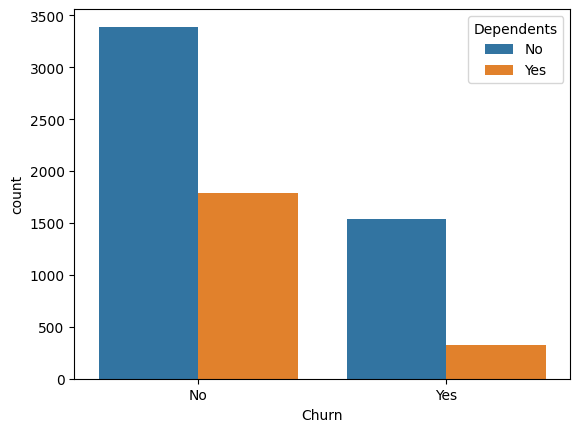

In [10]:
sns.countplot(data=df,x='Churn',hue='Dependents')
fig = plt.gcf()

# Get the size of the figure
fig_size = fig.get_size_inches()
print(fig_size)

<Axes: xlabel='Churn', ylabel='count'>

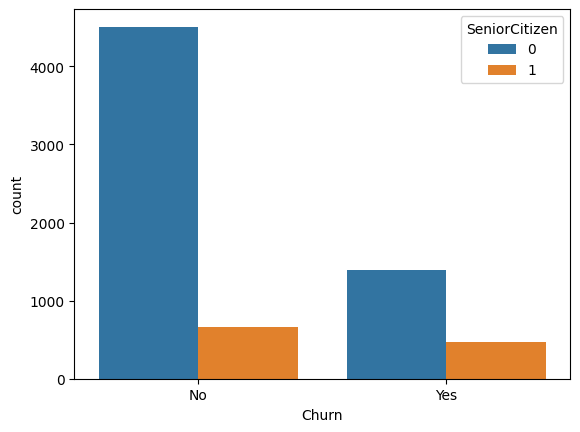

In [11]:
sns.countplot(data=df,x='Churn',hue='SeniorCitizen')

<Axes: xlabel='Churn', ylabel='count'>

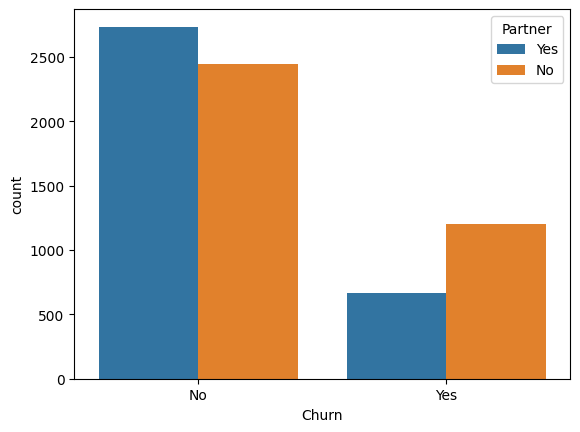

In [12]:
sns.countplot(data=df,x='Churn',hue='Partner')

<Axes: xlabel='Churn', ylabel='count'>

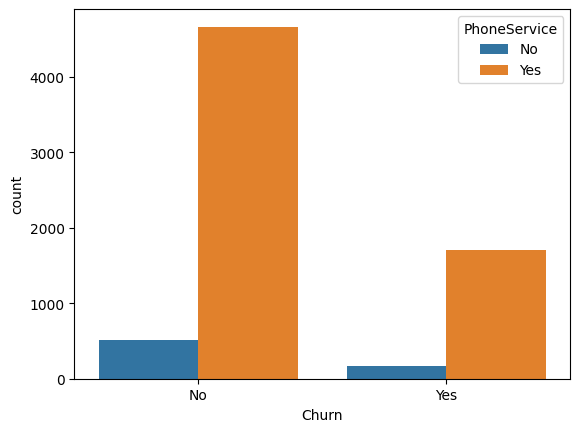

In [13]:
sns.countplot(data=df,x='Churn',hue='PhoneService')

<Axes: xlabel='PaperlessBilling', ylabel='count'>

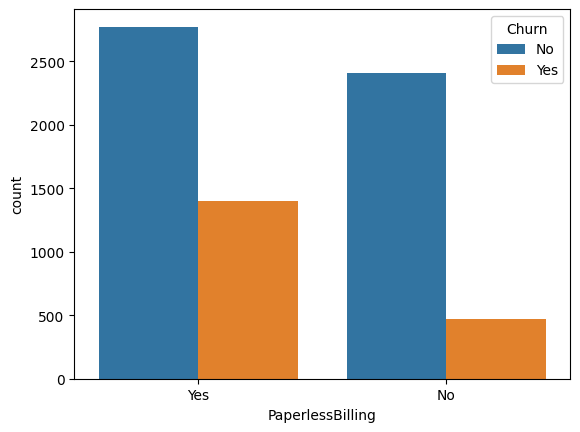

In [14]:
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')

<Axes: xlabel='InternetService', ylabel='count'>

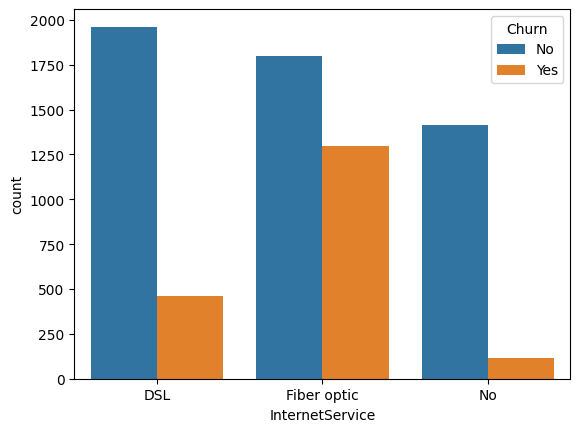

In [15]:
sns.countplot(data=df,x='InternetService',hue='Churn')

<Axes: xlabel='MultipleLines', ylabel='count'>

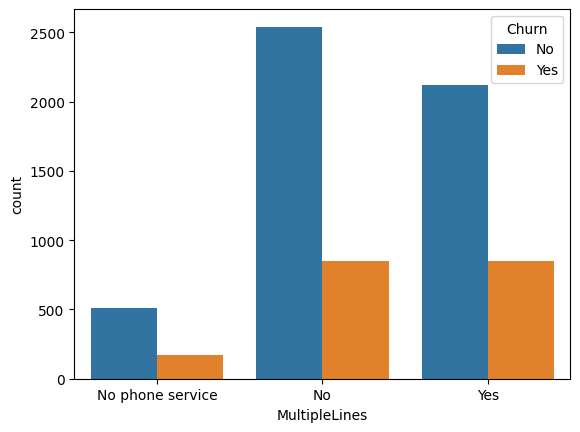

In [16]:
sns.countplot(data=df,x='MultipleLines',hue='Churn')

<Axes: xlabel='Contract', ylabel='count'>

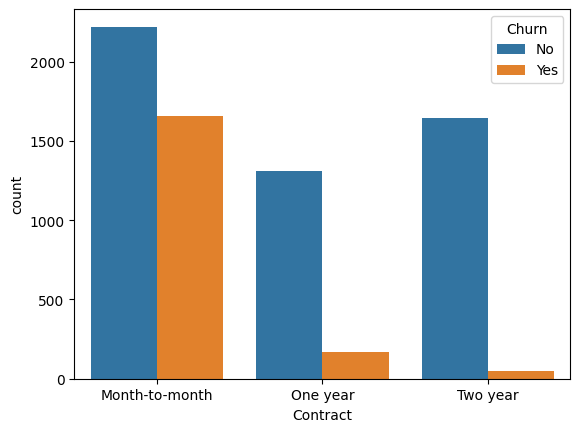

In [17]:
sns.countplot(data=df,x='Contract',hue='Churn')

<Axes: xlabel='PaymentMethod', ylabel='count'>

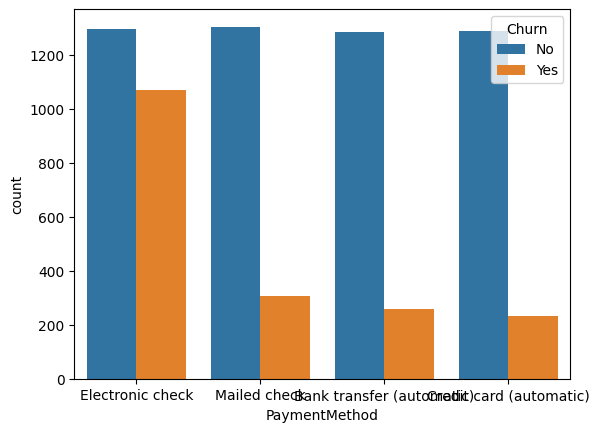

In [18]:
sns.countplot(data=df,x='PaymentMethod',hue='Churn')

<Axes: xlabel='OnlineSecurity', ylabel='count'>

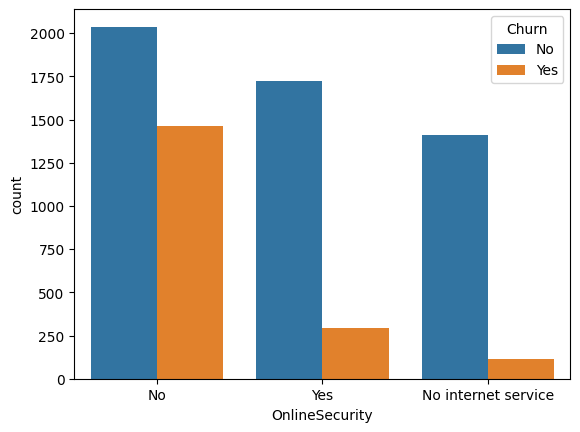

In [19]:
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')

<Axes: xlabel='OnlineBackup', ylabel='count'>

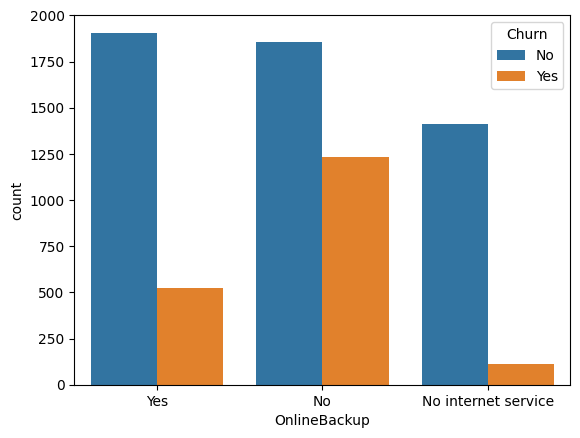

In [20]:
sns.countplot(data=df,x='OnlineBackup',hue='Churn')

<Axes: xlabel='DeviceProtection', ylabel='count'>

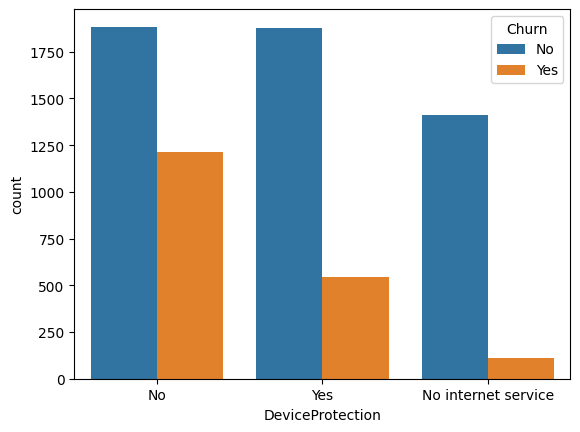

In [21]:
sns.countplot(data=df,x='DeviceProtection',hue='Churn')

<Axes: xlabel='TechSupport', ylabel='count'>

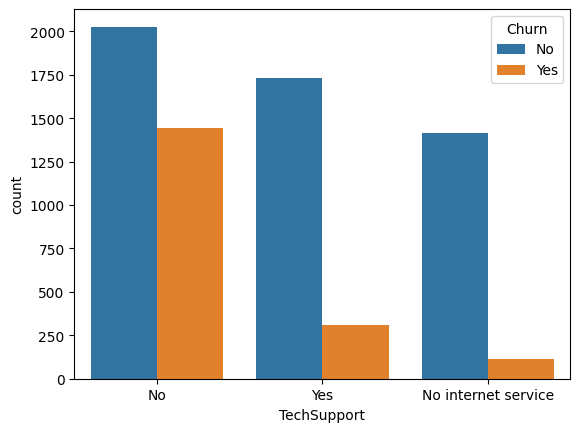

In [22]:
sns.countplot(data=df,x='TechSupport',hue='Churn')

<Axes: xlabel='StreamingTV', ylabel='count'>

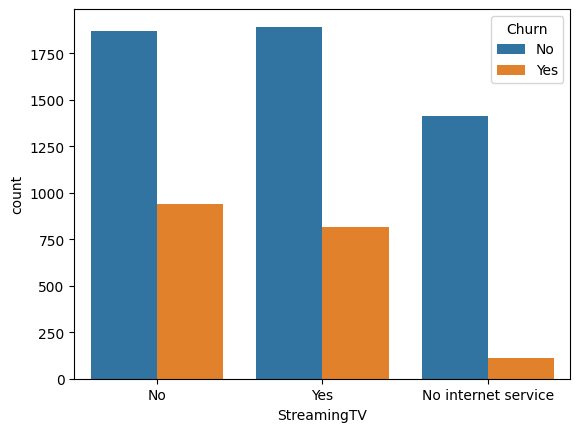

In [23]:
sns.countplot(data=df,x='StreamingTV',hue='Churn')

<Axes: xlabel='StreamingMovies', ylabel='count'>

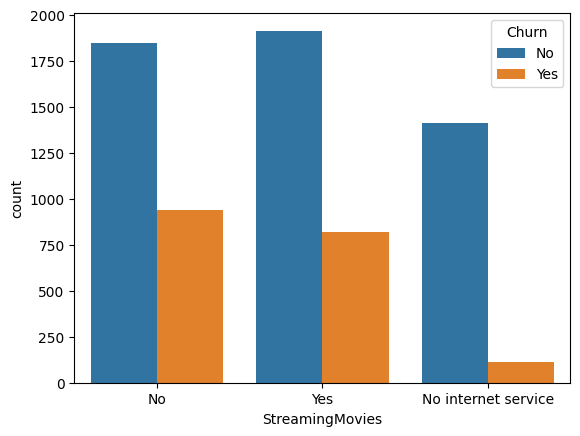

In [24]:
sns.countplot(data=df,x='StreamingMovies',hue='Churn')

In [25]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Converting object type to Float data type

In [26]:
totalc=df.columns.get_loc("TotalCharges")
new_total_c=pd.to_numeric(df.iloc[:,totalc], errors='coerce')
df.iloc[:,totalc]=pd.Series(new_total_c)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<ipython-input-26-066d9de2ce51>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,totalc]=pd.Series(new_total_c)


###Checking all Features and thier unique values

In [27]:
feature_names = df.columns[:-1]
class_names = df['Churn'].unique()

print("Feature Names:")
print(feature_names)
print("\nClass Names:")
print(class_names)


Feature Names:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Class Names:
['No' 'Yes']


In [28]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Handle missing values for nan_column (TotalCharges)

In [29]:

from sklearn.impute import SimpleImputer

# Find the column number for TotalCharges (starting at 0).
total_charges_idx = df.columns.get_loc("TotalCharges")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df.iloc[:, total_charges_idx] = imputer.fit_transform(df.iloc[:, total_charges_idx].values.reshape(-1, 1))
df.iloc[:, total_charges_idx] = pd.Series(df.iloc[:, total_charges_idx])

In [30]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Converting All unique values to boolean values (For the features having just 2 unique values)

In [31]:
Gender_Category_map = {
    'Male' : 1,
    'Female': 0,
}

Partner_Category_map = {
    'Yes' : 1,
    'No': 0,
}

Dependents_Category_map = {
    'Yes' : 1,
    'No': 0,
}


PhoneService_Category_map = {
    'Yes' : 1,
    'No': 0,
}

PaperlessBilling_Category_map = {
    'Yes' : 1,
    'No': 0,
}


Churn_Category_map = {
    'Yes' : 1,
    'No': 0,
}

In [32]:
df.loc[:, 'gender'] = df['gender'].map(Gender_Category_map)
df.loc[:, 'Partner'] = df['Partner'].map(Partner_Category_map)
df.loc[:, 'Dependents'] = df['Dependents'].map(Dependents_Category_map)
df.loc[:, 'PhoneService'] = df['PhoneService'].map(PhoneService_Category_map)
df.loc[:, 'PaperlessBilling'] = df['PaperlessBilling'].map(PaperlessBilling_Category_map)
df.loc[:, 'Churn'] = df['Churn'].map(Churn_Category_map)

# print to check
df.head()

<ipython-input-32-9e66987e14c4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'gender'] = df['gender'].map(Gender_Category_map)
<ipython-input-32-9e66987e14c4>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Partner'] = df['Partner'].map(Partner_Category_map)
<ipython-input-32-9e66987e14c4>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colum

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### Using one hot encoding for the countable unique values of the rest features to convert their values into boolean type

In [33]:
df=pd.get_dummies(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [34]:
y=np.array(df['Churn'])
print(type(y))
print(y)

<class 'numpy.ndarray'>
[0 0 1 ... 0 1 0]


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

### Popping out the target

In [36]:
df.pop('Churn')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [37]:
x=np.array(df)
type(x)
print(x)
print(y)

[[0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
[0 0 1 ... 0 1 0]


In [38]:
print(x.shape)

print(y.shape)

(7043, 40)
(7043,)


## Splitting into test and train datasets

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,7:9] = sc.fit_transform(x_train[:,7:9])
x_test[:,7:9] = sc.transform(x_test[:,7:9])

In [41]:
print("x_train = ",x_train)
print("y_train = ",y_train)
print("x_test = ",x_test)
print("y_test = ",y_test)

x_train =  [[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
y_train =  [0 1 0 ... 1 1 0]
x_test =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]
y_test =  [0 0 0 ... 0 0 1]


## IMPLEMENTING DECISION TREE ALGORITHM

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
y_pred = classifier.predict(x_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


### Model Accuracy

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("MODEL ACCURACY : ",accuracy_score(y_test, y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))

[[851 210]
 [152 196]]
MODEL ACCURACY :  74.30801987224982


              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1061
           1       0.48      0.56      0.52       348

    accuracy                           0.74      1409
   macro avg       0.67      0.68      0.67      1409
weighted avg       0.76      0.74      0.75      1409



### Classification Report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1061
           1       0.48      0.56      0.52       348

    accuracy                           0.74      1409
   macro avg       0.67      0.68      0.67      1409
weighted avg       0.76      0.74      0.75      1409



### Creating Confusion Matrix

Text(50.722222222222214, 0.5, 'Truth')

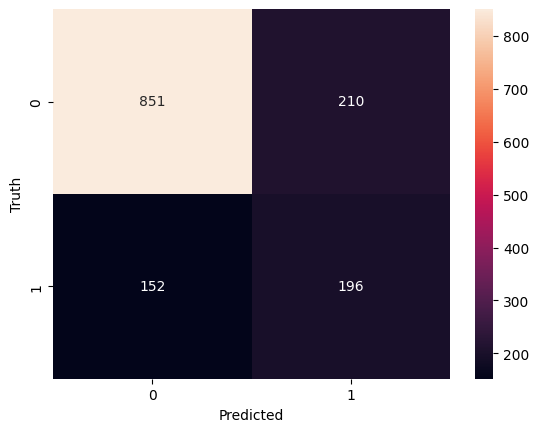

In [46]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (6.4,4.8))
sn.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Tree Visualisation

In [47]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# import matplotlib.pyplot as plt

# # Assuming x_train and y_train are your training data
# # Instantiate the DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# # Fit the classifier on the training data
# classifier.fit(x_train, y_train)

# # Visualize the decision tree
# plt.figure(figsize=(130, 20))
# plot_tree(classifier, filled=True )
# plt.title("Decision Tree Visualization")
# plt.show()


### Sample Prediction

In [48]:
xg=df.loc[4]
res = [val for idx, val in xg.iteritems()]
res=np.array(res)
y_pred = classifier.predict(res.reshape(1,-1))
print(y_pred)

[1]


<ipython-input-48-7159ac0d99cc>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  res = [val for idx, val in xg.iteritems()]


## IMPLEMENTING NAIVE BAYES ALGORITHM

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [50]:
y_pred = classifier.predict(x_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [1 0]
 [1 1]]


### Model Accuracy

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("MODEL ACCURACY : ",accuracy_score(y_test, y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))

[[679 382]
 [ 43 305]]
MODEL ACCURACY :  69.83676366217175


              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1061
           1       0.44      0.88      0.59       348

    accuracy                           0.70      1409
   macro avg       0.69      0.76      0.68      1409
weighted avg       0.82      0.70      0.72      1409



### Classification Report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1061
           1       0.44      0.88      0.59       348

    accuracy                           0.70      1409
   macro avg       0.69      0.76      0.68      1409
weighted avg       0.82      0.70      0.72      1409



### Creating Confusion Matrix

Text(50.722222222222214, 0.5, 'Truth')

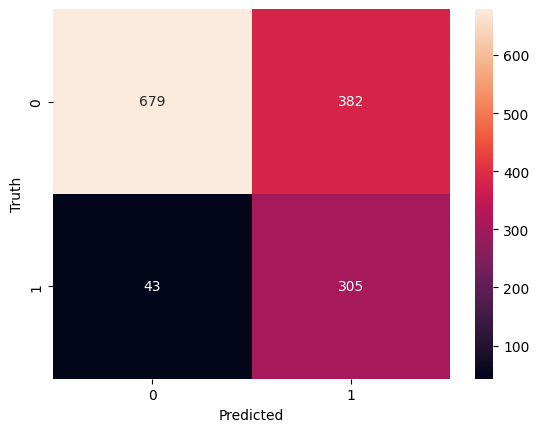

In [53]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (6.4,4.8))
sn.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## IMPLEMENTING RANDOM FOREST ALGORITHM

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500,criterion='gini', random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [55]:
y_pred = classifier.predict(x_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


### Model Accuracy

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("MODEL ACCURACY : ",accuracy_score(y_test, y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))

[[939 122]
 [155 193]]
MODEL ACCURACY :  80.34066713981547


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.61      0.55      0.58       348

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Classification Report

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.61      0.55      0.58       348

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Creating Confusion Matrix

Text(50.722222222222214, 0.5, 'Truth')

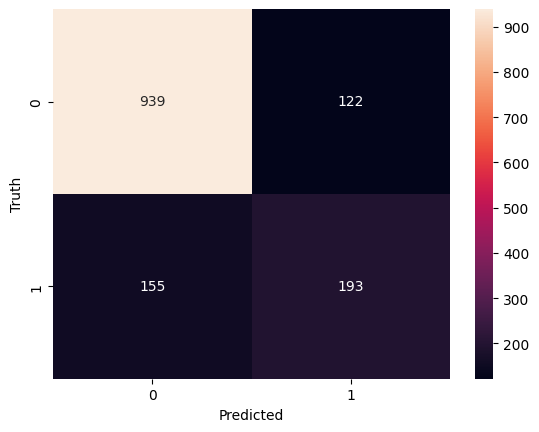

In [59]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (6.4,4.8))
sn.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Conclusion

As we performed our ananlysis using different machine learning algorithms, we get accuracies as:

Decision Tree Algorithm ▶ 74.30801987224982

Naive Bayes Algorithm ▶ 69.83676366217175

Random Forest Algorithm ▶ 80.34066713981547

Hence, we can conclude that among these, Random Foest Algorithm is the best method for our analysis.